# Esse trabalho visa trabalhar sobretudo uma análise exploratória dos dados

In [ ]:
import sqlite3
import pandas as pd
import numpy as np

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [170]:
import matplotlib.patches as mpatches

In [3]:
dados = pd.read_excel("Sample - Superstore.xls")

In [4]:
df = pd.DataFrame(dados)

In [6]:
df.head(10)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
5,6,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
6,7,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,OFF-AR-10002833,Office Supplies,Art,Newell 322,7.2800,4,0.00,1.9656
7,8,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,TEC-PH-10002275,Technology,Phones,Mitel 5320 IP Phone VoIP phone,907.1520,6,0.20,90.7152
8,9,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,OFF-BI-10003910,Office Supplies,Binders,DXL Angle-View Binders with Locking Rings by S...,18.5040,3,0.20,5.7825
9,10,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,OFF-AP-10002892,Office Supplies,Appliances,Belkin F5C206VTEL 6 Outlet Surge,114.9000,5,0.00,34.4700


In [178]:
df.tail()

,Row_ID,Order_ID,Order_Date,Data_De_Envio,Modo_De_Envio,Cliente_ID,Cliente_Nome,Segmento,Pais,Cidade,...,Desconto,Lucro_Prejuizo,Ano,Mes,MesAno,MesAnoOrdenado,Valor_Unitario,Novo_Desconto,Novo_Desconto2,Valor_Venda_Pos_Desconto
9989,9990,CA-2014-110422,2014-01-21,2014-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,0.2,4.1028,2014,1,Jan/2014,2014-01,8.416,0.1,0.1,22.7232
9990,9991,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,0.0,15.6332,2017,2,Feb/2017,2017-02,45.980,0.1,0.1,82.7640
9991,9992,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,0.2,19.3932,2017,2,Feb/2017,2017-02,129.288,0.1,0.1,232.7184
9992,9993,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,0.0,13.3200,2017,2,Feb/2017,2017-02,7.400,0.1,0.1,26.6400
9993,9994,CA-2017-119914,2017-05-04,2017-05-09,Second Class,CC-12220,Chris Cortes,Consumer,United States,Westminster,...,0.0,72.9480,2017,5,May/2017,2017-05,121.580,0.1,0.1,218.8440


In [7]:
df.shape

(9994, 21)

# Tratamento dos dados

In [8]:
# Primeirissimo passo será fazer o tratamento dos dados == Dados fatantes, duplicatas, dados irrelevantes, nomear colunas
# Temos que verificar linhas 'sem dados' e decidir como tratar isso, eliminar duplicatas e remover dados irrelevantes
df.isna().sum()
# Não temos nada vazio

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [9]:
# Duplicatas
# Order Id não é um om parâmetro pois os dados são diferentes. usaremos o ID
duplicatas = df.drop(columns = ['Row ID']).duplicated()

In [10]:
df[duplicatas]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
3406,3407,US-2014-150119,2014-04-23,2014-04-27,Standard Class,LB-16795,Laurel Beltran,Home Office,United States,Columbus,...,43229,East,FUR-CH-10002965,Furniture,Chairs,Global Leather Highback Executive Chair with P...,281.372,2,0.3,-12.0588


In [11]:
df.iloc[3405:3407]
# Linhas que estão duplicadas no data frame

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
3405,3406,US-2014-150119,2014-04-23,2014-04-27,Standard Class,LB-16795,Laurel Beltran,Home Office,United States,Columbus,...,43229,East,FUR-CH-10002965,Furniture,Chairs,Global Leather Highback Executive Chair with P...,281.372,2,0.3,-12.0588
3406,3407,US-2014-150119,2014-04-23,2014-04-27,Standard Class,LB-16795,Laurel Beltran,Home Office,United States,Columbus,...,43229,East,FUR-CH-10002965,Furniture,Chairs,Global Leather Highback Executive Chair with P...,281.372,2,0.3,-12.0588


In [12]:
df = df[~df.drop(columns = ['Row ID']).duplicated()]

In [13]:
df.shape

(9993, 21)

In [14]:
df.iloc[3405:3407]
# Verificando se a eliminação ocorreu

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
3405,3406,US-2014-150119,2014-04-23,2014-04-27,Standard Class,LB-16795,Laurel Beltran,Home Office,United States,Columbus,...,43229,East,FUR-CH-10002965,Furniture,Chairs,Global Leather Highback Executive Chair with P...,281.372,2,0.3,-12.0588
3407,3408,US-2014-150119,2014-04-23,2014-04-27,Standard Class,LB-16795,Laurel Beltran,Home Office,United States,Columbus,...,43229,East,OFF-BI-10000145,Office Supplies,Binders,Zipper Ring Binder Pockets,7.488,8,0.7,-5.2416


In [15]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [16]:
df.columns = ['Row_ID', "Order_ID","Order_Date","Data_De_Envio", "Modo_De_Envio","Cliente_ID","Cliente_Nome","Segmento","Pais","Cidade","Estado","Codigo_Postal","Região","Produto_ID","Categoria","Sub_Categoria","Nome_Produto","Vendas","Quantidade","Desconto","Lucro_Prejuizo"]

In [17]:
df.columns

Index(['Row_ID', 'Order_ID', 'Order_Date', 'Data_De_Envio', 'Modo_De_Envio',
       'Cliente_ID', 'Cliente_Nome', 'Segmento', 'Pais', 'Cidade', 'Estado',
       'Codigo_Postal', 'Região', 'Produto_ID', 'Categoria', 'Sub_Categoria',
       'Nome_Produto', 'Vendas', 'Quantidade', 'Desconto', 'Lucro_Prejuizo'],
      dtype='object')

In [18]:
# Correção de tipos de dados
df['Order_Date'] = pd.to_datetime(df.Order_Date)
df['Data_De_Envio'] = pd.to_datetime(df.Data_De_Envio)
df['Vendas'] = df['Vendas'].replace('.',',').astype(float)
df['Quantidade'] = df['Quantidade'].astype(int)
df['Lucro_Prejuizo'] = df['Lucro_Prejuizo'].astype(float)

In [19]:
# Vendo se tem algum tipo de padronização necessária
df.Segmento.value_counts().sort_index()

Consumer       5191
Corporate      3020
Home Office    1782
Name: Segmento, dtype: int64

In [20]:
df.head(5)

,Row_ID,Order_ID,Order_Date,Data_De_Envio,Modo_De_Envio,Cliente_ID,Cliente_Nome,Segmento,Pais,Cidade,...,Codigo_Postal,Região,Produto_ID,Categoria,Sub_Categoria,Nome_Produto,Vendas,Quantidade,Desconto,Lucro_Prejuizo
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


# Análise Exploratória

### O trabalho consiste em responder primeiramente as seguintes questões:

1. Qual Cidade com Maior Valor de Venda de Produtos da Categoria 'Office Supplies'?
2. Qual o Total de Vendas Por Data do Pedido?
3. Qual o Total de Vendas por Estado?
4. Quais São as 10 Cidades com Maior Total de Vendas?
5. Qual Segmento Teve o Maior Total de Vendas?


### 1. Qual Cidade com Maior Valor de Venda de Produtos da Categoria 'Office Supplies'?

In [21]:
df['Categoria'].describe()
# A coluna esconto dá o desconto em %, será que já está aplicado em vendas?

count                9993
unique                  3
top       Office Supplies
freq                 6026
Name: Categoria, dtype: object

In [22]:
df_filtrado = (df[df['Categoria'] == 'Office Supplies'][ ['Categoria', 'Cidade','Vendas'] ].groupby( ['Categoria','Cidade'] ).sum())

In [23]:
# A resposta para a primeira pergunta é: Nova York
linhadf = df_filtrado[df_filtrado['Vendas'] == df_filtrado['Vendas'].max()]
print(linhadf)

                                  Vendas
Categoria       Cidade                  
Office Supplies New York City  71361.006


### Qual o Total de Vendas Por Data do Pedido?
####  Demonstre o resultado através de um gráfico de barras.

In [24]:
pd.set_option('display.max_rows', None)

In [25]:
df[ ['Order_Date','Vendas'] ].groupby('Order_Date').sum()
# Por dia vai ficar muito cheio um gráfico de barras, melhor seria usar o de linhas para análisar as tendências
# Mas daria quase no mesmo afinal
# Para um gráfico de barras seria interessante dividir os dados em anuais, semestrais, trimestrais...

,Vendas
Order_Date,
2014-01-03,16.4480
2014-01-04,288.0600
2014-01-05,19.5360
2014-01-06,4407.1000
2014-01-07,87.1580
2014-01-09,40.5440
2014-01-10,54.8300
2014-01-11,9.9400
2014-01-13,3553.7950


In [26]:
filtroData = df[ ['Order_Date','Vendas'] ].groupby('Order_Date').sum()

In [27]:
dataVenda = df['Order_Date']
Venda = df['Vendas']

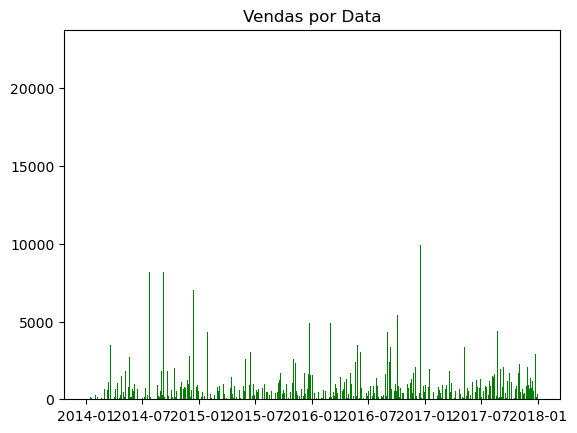

In [28]:
plt.bar(dataVenda, Venda, color = "green")
plt.title("Vendas por Data")
plt.show()

In [29]:
# Ficou horrível
df['Ano'] = df['Order_Date'].dt.year

In [30]:
vendas_por_ano = df.groupby('Ano')['Vendas'].sum()

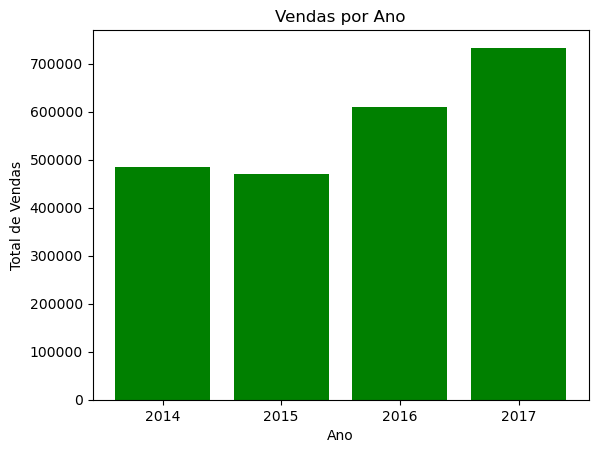

In [31]:
plt.bar(vendas_por_ano.index, vendas_por_ano.values, color = "green")
plt.title("Vendas por Ano")
plt.xlabel("Ano")
plt.ylabel("Total de Vendas")
plt.xticks(vendas_por_ano.index)
plt.show()

In [32]:
# Ainda não gostei do resultado inicial
df['Mes'] = df['Order_Date'].dt.month
vendas_por_mes = df.groupby('Mes')['Vendas'].sum()

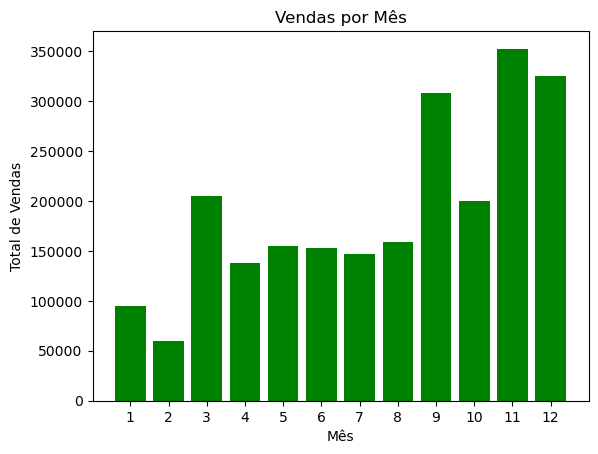

In [33]:
plt.bar(vendas_por_mes.index, vendas_por_mes.values, color = "green")
plt.title("Vendas por Mês")
plt.xlabel("Mês")
plt.ylabel("Total de Vendas")
plt.xticks(vendas_por_mes.index)
plt.show()

# Vemos que as vendas tem a tendência de serem bem maiores no final do ano
# Mas não era isso que eu queria

In [34]:
df['MesAno'] = df['Order_Date'].dt.strftime('%b/%Y')
vendas_por_mes_ano = df.groupby('MesAno')['Vendas'].sum()

In [35]:
df['MesAnoOrdenado'] = df['Order_Date'].dt.to_period('M')  # cria objeto tipo Period
vendas_ordenado = df.groupby('MesAnoOrdenado')['Vendas'].sum().sort_index()
vendas_ordenado.index = vendas_ordenado.index.strftime('%b/%Y')

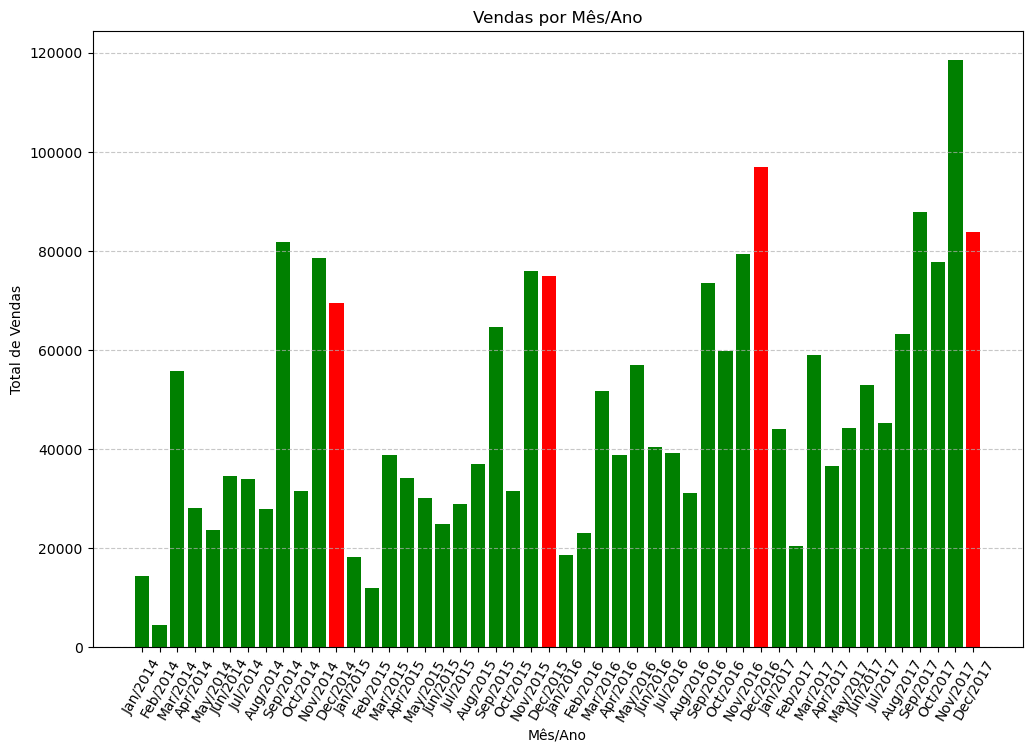

In [36]:
plt.figure(figsize = (12,8))
# Cor vermelha para dezembro e verde para os demais anos
cores = ['red' if 'Dec' in mes_ano else 'green' for mes_ano in vendas_ordenado.index]
plt.bar(vendas_ordenado.index, vendas_ordenado.values, color = cores)
plt.title("Vendas por Mês/Ano")
plt.xlabel("Mês/Ano")
plt.ylabel("Total de Vendas")
# Adicionando linha de grade no gráfico// axis é referente ao eixo que será adiocionado
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(vendas_ordenado.index, rotation = 60)
plt.show()

In [37]:
# Gostei mais desse.
# Coloquei a barra de dezemro em vermelho para deixar mais claro quano começa e quando termina os anos

### Qual o Total de Vendas por Estado?
#### Demonstre o resultado através de um gráfico de barras.

In [38]:
df.columns

Index(['Row_ID', 'Order_ID', 'Order_Date', 'Data_De_Envio', 'Modo_De_Envio',
       'Cliente_ID', 'Cliente_Nome', 'Segmento', 'Pais', 'Cidade', 'Estado',
       'Codigo_Postal', 'Região', 'Produto_ID', 'Categoria', 'Sub_Categoria',
       'Nome_Produto', 'Vendas', 'Quantidade', 'Desconto', 'Lucro_Prejuizo',
       'Ano', 'Mes', 'MesAno', 'MesAnoOrdenado'],
      dtype='object')

In [42]:
df.head(3)

,Row_ID,Order_ID,Order_Date,Data_De_Envio,Modo_De_Envio,Cliente_ID,Cliente_Nome,Segmento,Pais,Cidade,...,Sub_Categoria,Nome_Produto,Vendas,Quantidade,Desconto,Lucro_Prejuizo,Ano,Mes,MesAno,MesAnoOrdenado
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136,2016,11,Nov/2016,2016-11
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820,2016,11,Nov/2016,2016-11
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.0,6.8714,2016,6,Jun/2016,2016-06


In [40]:
df[ ['Estado','Vendas'] ].groupby('Estado')['Vendas'].sum()

Estado
Alabama                  19510.6400
Arizona                  35282.0010
Arkansas                 11678.1300
California              457687.6315
Colorado                 32108.1180
Connecticut              13384.3570
Delaware                 27451.0690
District of Columbia      2865.0200
Florida                  89473.7080
Georgia                  49095.8400
Idaho                     4382.4860
Illinois                 80166.1010
Indiana                  53555.3600
Iowa                      4579.7600
Kansas                    2914.3100
Kentucky                 36591.7500
Louisiana                 9217.0300
Maine                     1270.5300
Maryland                 23705.5230
Massachusetts            28634.4340
Michigan                 76269.6140
Minnesota                29863.1500
Mississippi              10771.3400
Missouri                 22205.1500
Montana                   5589.3520
Nebraska                  7464.9300
Nevada                   16729.1020
New Hampshire        

In [43]:
dfVendasPorEstado = df[ ['Estado','Vendas'] ].groupby('Estado')['Vendas'].sum()

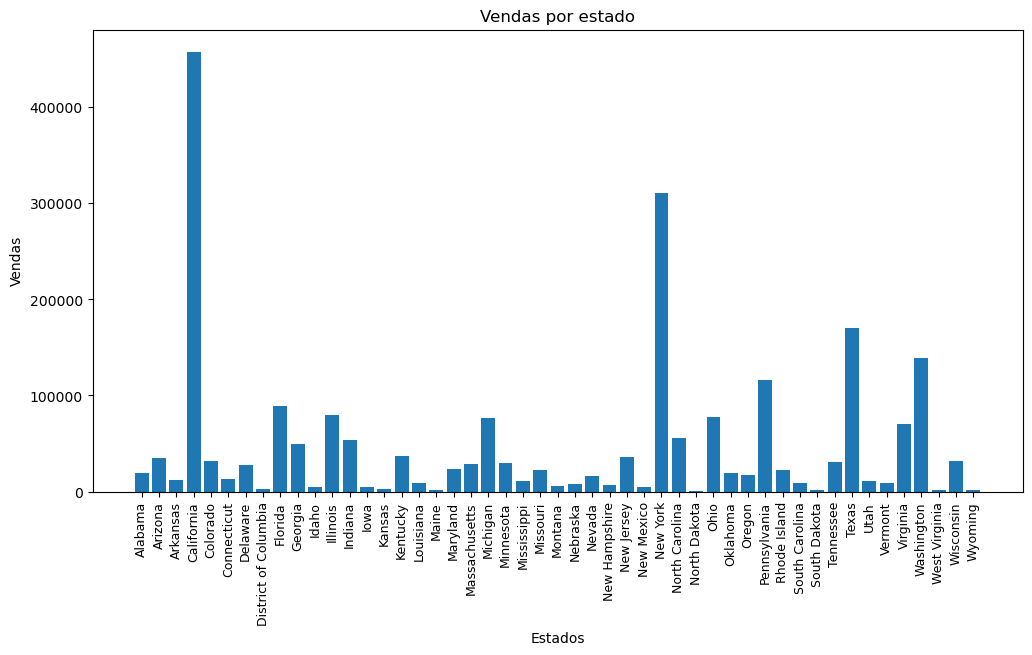

In [52]:
plt.figure(figsize = (12,6))
plt.bar(dfVendasPorEstado.index,dfVendasPorEstado.values)
plt.title("Vendas por estado")
plt.xlabel("Estados")
plt.ylabel("Vendas")
plt.xticks(dfVendasPorEstado.index, rotation = 90, fontsize = 9)
plt.show()

## Quais São as 10 Cidades com Maior Total de Vendas?
#### Demonstre o resultado através de um gráfico de barras.

In [53]:
df.columns

Index(['Row_ID', 'Order_ID', 'Order_Date', 'Data_De_Envio', 'Modo_De_Envio',
       'Cliente_ID', 'Cliente_Nome', 'Segmento', 'Pais', 'Cidade', 'Estado',
       'Codigo_Postal', 'Região', 'Produto_ID', 'Categoria', 'Sub_Categoria',
       'Nome_Produto', 'Vendas', 'Quantidade', 'Desconto', 'Lucro_Prejuizo',
       'Ano', 'Mes', 'MesAno', 'MesAnoOrdenado'],
      dtype='object')

In [70]:
df[['Cidade','Vendas']].groupby('Cidade')['Vendas'].sum().nlargest(10)

Cidade
New York City    256368.1610
Los Angeles      175851.3410
Seattle          119540.7420
San Francisco    112669.0920
Philadelphia     109077.0130
Houston           64504.7604
Chicago           48539.5410
San Diego         47521.0290
Jacksonville      44713.1830
Springfield       43054.3420
Name: Vendas, dtype: float64

In [71]:
cidadesMaisVendas = df[['Cidade','Vendas']].groupby('Cidade')['Vendas'].sum().nlargest(10)


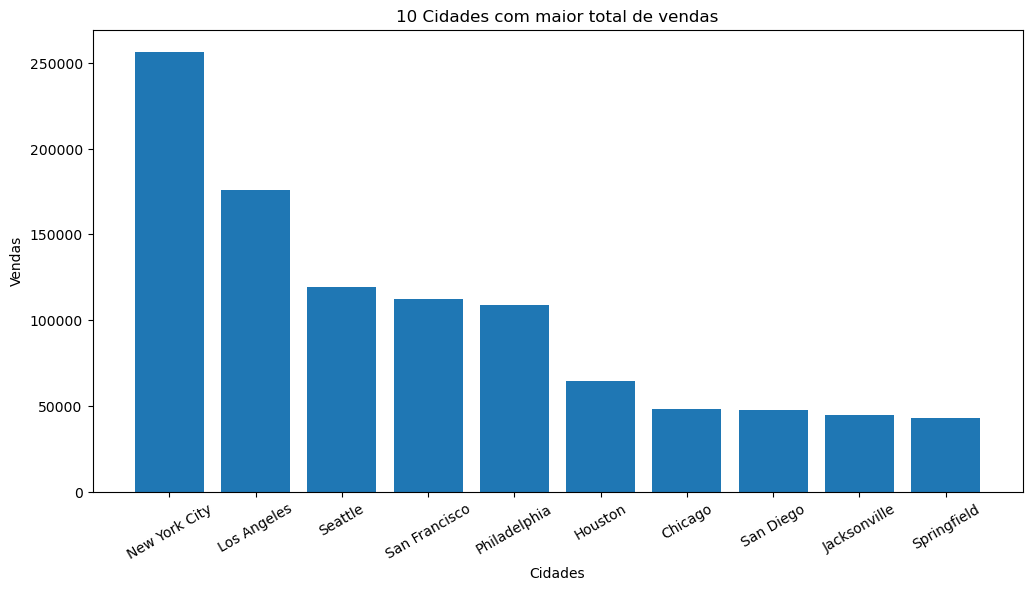

In [74]:
plt.figure(figsize = (12,6))
plt.bar(cidadesMaisVendas.index, cidadesMaisVendas.values)
plt.xlabel("Cidades")
plt.ylabel("Vendas")
plt.title("10 Cidades com maior total de vendas")
plt.xticks(cidadesMaisVendas.index, rotation = 30)
plt.show()

## Qual Segmento Teve o Maior Total de Vendas?
#### Demonstre o resultado através de um gráfico de pizza

In [84]:

vendasSegmento =  df[['Segmento','Vendas']].groupby("Segmento")["Vendas"].sum()

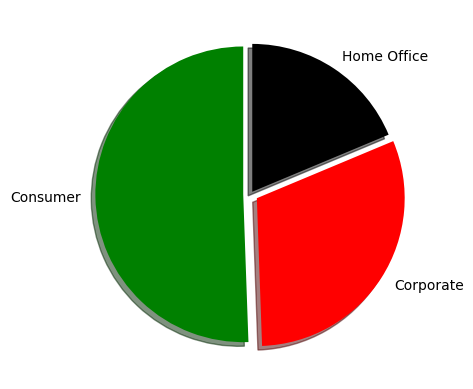

In [91]:
plt.pie(vendasSegmento.values,labels = vendasSegmento.index,colors = ['green','red','black'] , startangle=90,shadow = True, explode = (0.05,0.05,0.02))
plt.show()

## Qual o Total de Vendas Por Segmento e Por Ano?

In [93]:
df[['Segmento','Vendas', 'Ano']].groupby(["Ano", "Segmento"])["Vendas"].sum()

Ano   Segmento   
2014  Consumer       266096.8126
      Corporate      128434.8737
      Home Office     89434.4398
2015  Consumer       266535.9333
      Corporate      128757.3069
      Home Office     75239.2688
2016  Consumer       296863.8992
      Corporate      207106.3618
      Home Office    105235.3370
2017  Consumer       331904.6999
      Corporate      241847.8244
      Home Office    159462.7309
Name: Vendas, dtype: float64

## Os gestores da empresa estão considerando conceder diferentes faixas de descontos e gostariam de fazer uma simulação com base na regra abaixo:
#### Se o Valor_Venda for maior que 1000 recebe 15% de desconto.
#### Se o Valor_Venda for menor que 1000 recebe 10% de desconto.
## Quantas Vendas Receberiam 15% de Desconto?

In [109]:
df.head(5)

,Row_ID,Order_ID,Order_Date,Data_De_Envio,Modo_De_Envio,Cliente_ID,Cliente_Nome,Segmento,Pais,Cidade,...,Vendas,Quantidade,Desconto,Lucro_Prejuizo,Ano,Mes,MesAno,MesAnoOrdenado,Valor_Unitario,Novo_Desconto
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,261.9600,2,0.00,41.9136,2016,11,Nov/2016,2016-11,130.9800,0.1
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,731.9400,3,0.00,219.5820,2016,11,Nov/2016,2016-11,243.9800,0.1
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,14.6200,2,0.00,6.8714,2016,6,Jun/2016,2016-06,7.3100,0.1
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,957.5775,5,0.45,-383.0310,2015,10,Oct/2015,2015-10,191.5155,0.1
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,22.3680,2,0.20,2.5164,2015,10,Oct/2015,2015-10,11.1840,0.1


In [95]:
# Para essa questão teremos de olhar para o valor unitário da venda que pode serobtido por meio da divisão entre venda pela quantidade vendida
df['Valor_Unitario'] = df['Vendas']/df['Quantidade']


In [108]:

df['Novo_Desconto'] = df['Valor_Unitario'].apply(lambda x: 0.1 if x < 1000 else 0.15)

In [110]:
df['Novo_Desconto'].value_countss()

0.10    9956
0.15      37
Name: Novo_Desconto, dtype: int64

In [111]:
# Na verdade não faz muito sentido olhar para o valor unitário
df['Novo_Desconto2'] = df['Vendas'].apply(lambda x: 0.1 if x < 1000 else 0.15)

In [113]:
df['Novo_Desconto2'].value_counts()

0.10    9525
0.15     468
Name: Novo_Desconto2, dtype: int64

## Considere Que a Empresa Decida Conceder o Desconto de 15% do Item Anterior. Qual Seria a Média do Valor de Venda Antes e Depois do Desconto?

In [118]:
df['Valor_Venda_Pos_Desconto'] = df['Vendas']*(1-df['Novo_Desconto2'])

In [119]:
df.Vendas.mean()

229.8528458220755

In [120]:
df.Valor_Venda_Pos_Desconto.mean()

201.91324782247574

## Qual o Média de Vendas Por Segmento, Por Ano e Por Mês? Demonstre o resultado através de gráfico de linha.

In [121]:
df[['Segmento','Ano','Mes','Vendas']].groupby(['Ano','Mes','Segmento'])['Vendas'].mean()

Ano   Mes  Segmento   
2014  1    Consumer        141.384020
           Corporate       130.886769
           Home Office     329.855882
      2    Consumer        117.327926
           Corporate        98.639000
           Home Office      24.052857
      3    Consumer        152.170564
           Corporate       226.669367
           Home Office    1090.496867
      4    Consumer        189.762750
           Corporate       235.528817
           Home Office     183.601231
      5    Consumer        180.551592
           Corporate       247.081081
           Home Office     120.508857
      6    Consumer        270.039038
           Corporate       172.648435
           Home Office     293.779125
      7    Consumer        288.539143
           Corporate       213.467830
           Home Office     142.910192
      8    Consumer        188.549576
           Corporate       173.297070
           Home Office     176.767958
      9    Consumer        375.412893
           Corporate       

In [128]:
mediaConsumerAno = df[df['Segmento']=='Consumer'][['Segmento','Ano','Vendas']].groupby(['Ano','Segmento'])['Vendas'].mean()
mediaCorporateAno = df[df['Segmento']=='Corporate'][['Segmento','Ano','Vendas']].groupby(['Ano','Segmento'])['Vendas'].mean()
mediaHome_OfficeAno = df[df['Segmento']=='Home Office'][['Segmento','Ano','Vendas']].groupby(['Ano','Segmento'])['Vendas'].mean()


Ano   Segmento
2014  Consumer    248.688610
2015  Consumer    236.920830
2016  Consumer    223.542093
2017  Consumer    198.983633
Name: Vendas, dtype: float64

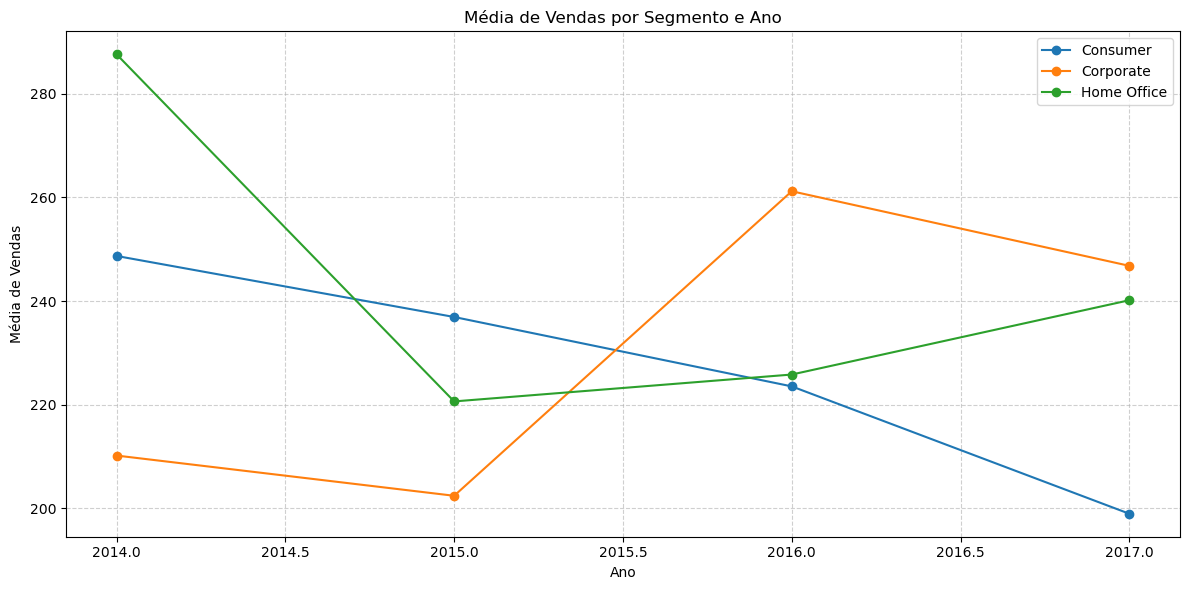

In [133]:
fig = plt.figure(figsize = (12,6))

plt.plot(mediaConsumerAno.index.get_level_values('Ano'),mediaConsumerAno.values, marker = 'o', label = 'Consumer')
plt.plot(mediaCorporateAno.index.get_level_values('Ano'), mediaCorporateAno.values, marker='o', label= 'Corporate')
plt.plot(mediaHome_OfficeAno.index.get_level_values('Ano'), mediaHome_OfficeAno.values, marker='o', label= 'Home Office')

plt.title('Média de Vendas por Segmento e Ano')
plt.xlabel('Ano')
plt.ylabel('Média de Vendas')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()

In [134]:
mediaConsumerMes = df[df['Segmento']=='Consumer'][['Segmento','Mes','Vendas']].groupby(['Mes','Segmento'])['Vendas'].mean()
mediaCorporateMes = df[df['Segmento']=='Corporate'][['Segmento','Mes','Vendas']].groupby(['Mes','Segmento'])['Vendas'].mean()
mediaHome_OfficeMes = df[df['Segmento']=='Home Office'][['Segmento','Mes','Vendas']].groupby(['Mes','Segmento'])['Vendas'].mean()


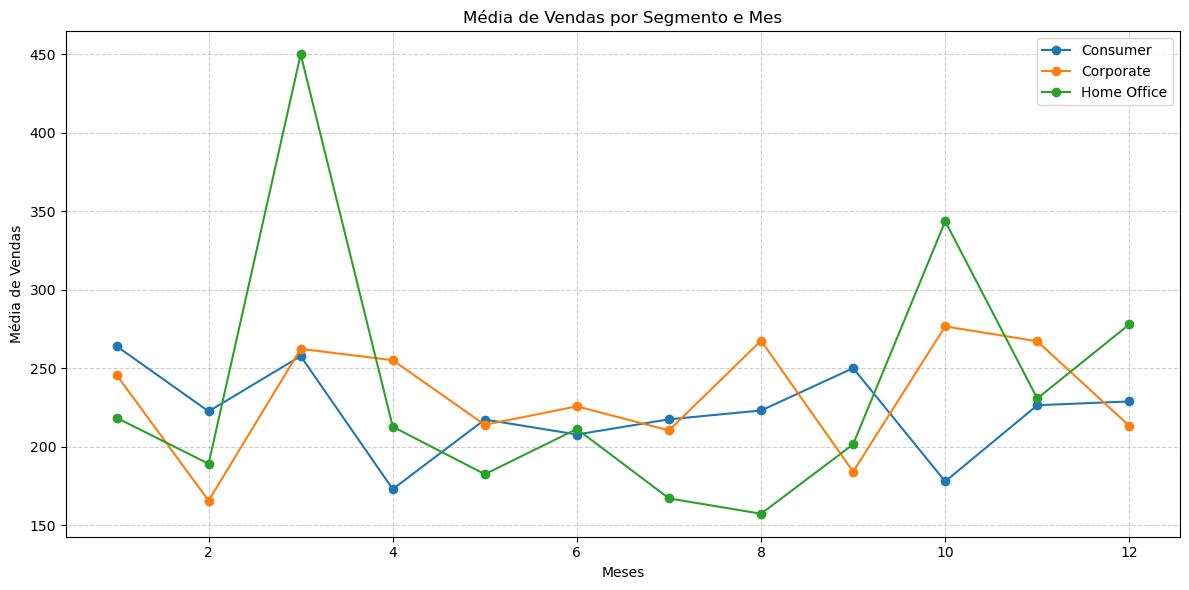

In [137]:
fig = plt.figure(figsize = (12,6))

plt.plot(mediaConsumerMes.index.get_level_values('Mes'),mediaConsumerMes.values, marker = 'o', label = 'Consumer')
plt.plot(mediaCorporateMes.index.get_level_values('Mes'), mediaCorporateMes.values, marker='o', label= 'Corporate')
plt.plot(mediaHome_OfficeMes.index.get_level_values('Mes'), mediaHome_OfficeMes.values, marker='o', label= 'Home Office')

plt.title('Média de Vendas por Segmento e Mes')
plt.xlabel('Meses')
plt.ylabel('Média de Vendas')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()

## Qual o Total de Vendas Por Categoria e SubCategoria, Considerando Somente as Top 12 SubCategorias?

In [138]:
df.columns

Index(['Row_ID', 'Order_ID', 'Order_Date', 'Data_De_Envio', 'Modo_De_Envio',
       'Cliente_ID', 'Cliente_Nome', 'Segmento', 'Pais', 'Cidade', 'Estado',
       'Codigo_Postal', 'Região', 'Produto_ID', 'Categoria', 'Sub_Categoria',
       'Nome_Produto', 'Vendas', 'Quantidade', 'Desconto', 'Lucro_Prejuizo',
       'Ano', 'Mes', 'MesAno', 'MesAnoOrdenado', 'Valor_Unitario',
       'Novo_Desconto', 'Novo_Desconto2', 'Valor_Venda_Pos_Desconto'],
      dtype='object')

In [147]:
df[['Categoria','Sub_Categoria','Vendas']].groupby(['Categoria','Sub_Categoria'])['Vendas'].sum()

Categoria        Sub_Categoria
Furniture        Bookcases        114879.9963
                 Chairs           328167.7310
                 Furnishings       91705.1640
                 Tables           206965.5320
Office Supplies  Appliances       107532.1610
                 Art               27118.7920
                 Binders          203412.7330
                 Envelopes         16476.4020
                 Fasteners          3024.2800
                 Labels            12486.3120
                 Paper             78479.2060
                 Storage          223843.6080
                 Supplies          46673.5380
Technology       Accessories      167380.3180
                 Copiers          149528.0300
                 Machines         189238.6310
                 Phones           330007.0540
Name: Vendas, dtype: float64

In [146]:
top12 = df[['Categoria','Sub_Categoria','Vendas']].groupby(['Categoria','Sub_Categoria'])['Vendas'].sum().nlargest(12)
top12
# df['Novo_Desconto2'] = df['Vendas'].apply(lambda x: 0.1 if x < 1000 else 0.15)

Categoria        Sub_Categoria
Technology       Phones           330007.0540
Furniture        Chairs           328167.7310
Office Supplies  Storage          223843.6080
Furniture        Tables           206965.5320
Office Supplies  Binders          203412.7330
Technology       Machines         189238.6310
                 Accessories      167380.3180
                 Copiers          149528.0300
Furniture        Bookcases        114879.9963
Office Supplies  Appliances       107532.1610
Furniture        Furnishings       91705.1640
Office Supplies  Paper             78479.2060
Name: Vendas, dtype: float64

In [148]:
# Para o gráico eu quero dividir em blocos que serão as categorias
# As barras serão as sub categorias em sí
# Posso colocar cores diferentes para cada categoria para diferenciá-las
# Será um gráfico de barras

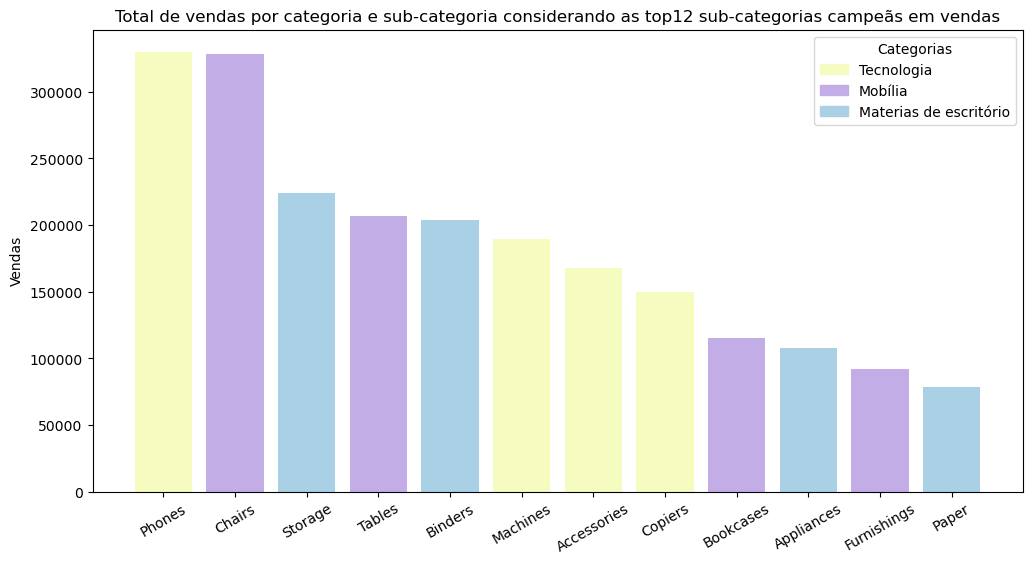

In [177]:
plt.figure(figsize=(12,6))
mapa_cores = {
    'Technology': ('#f6fbbf','Tecnologia'),
    'Furniture': ('#c3ade6','Mobília'),
    'Office Supplies': ('#aad0e5','Materias de escritório')
}
coresUlt = [mapa_cores[categoria][0] for categoria in top12.index.get_level_values('Categoria')]

legendas = [
    mpatches.Patch(color=cor, label=nome)
    for cor, nome in mapa_cores.values()
]

plt.bar(top12.index.get_level_values('Sub_Categoria'), top12.values, color=coresUlt)
plt.xticks(top12.index.get_level_values('Sub_Categoria'), rotation = 30)
plt.title("Total de vendas por categoria e sub-categoria considerando as top12 sub-categorias campeãs em vendas")
plt.ylabel("Vendas")
plt.legend(handles = legendas, title=('Categorias'))
plt.show()